<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/1015_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

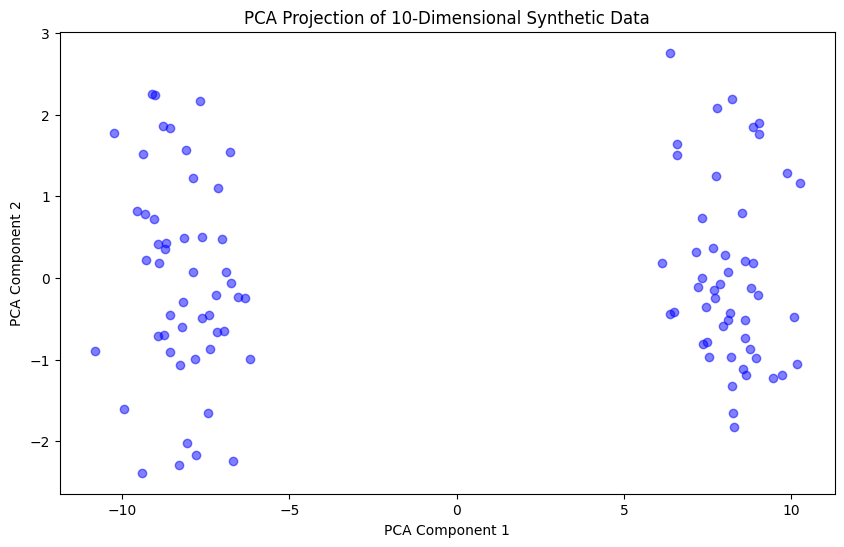

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# 1. 가상 데이터 생성 (10차원, 100개의 샘플)
X, _ = make_blobs(n_samples=100, n_features=10, centers=2, random_state=42)

# 2. PCA를 사용한 차원 축소 (2차원으로)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. 시각화
plt.figure(figsize=(10, 6))

# 각 클러스터의 데이터 포인트를 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', alpha=0.5)
plt.title('PCA Projection of 10-Dimensional Synthetic Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


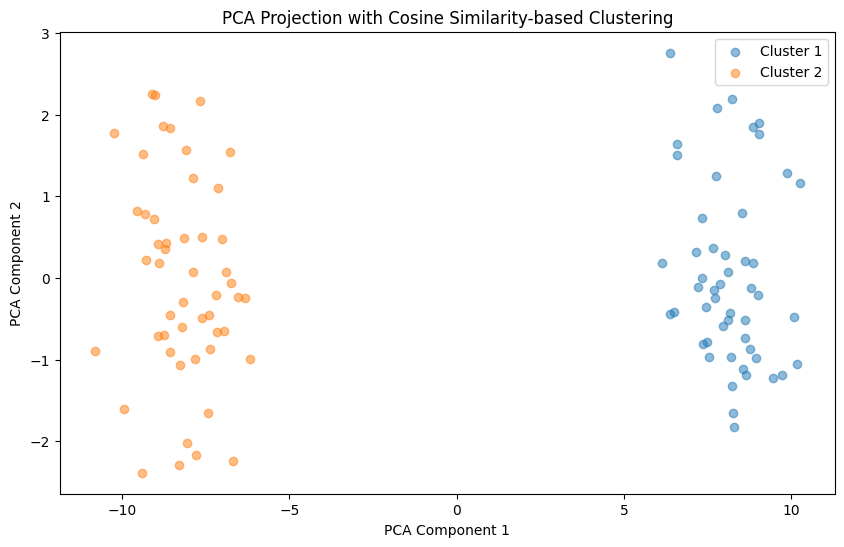

In [14]:
from sklearn.cluster import KMeans

# 3. KMeans 클러스터링 (2개의 클러스터로 분할)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_pca)

# 여기서는 단순히 KMeans 레이블을 사용하여 시각화

# 4. 시각화
plt.figure(figsize=(10, 6))

# 각 클러스터의 데이터 포인트를 시각화
for label in np.unique(labels):
    plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], label=f'Cluster {label + 1}', alpha=0.5)

plt.title('PCA Projection with Cosine Similarity-based Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

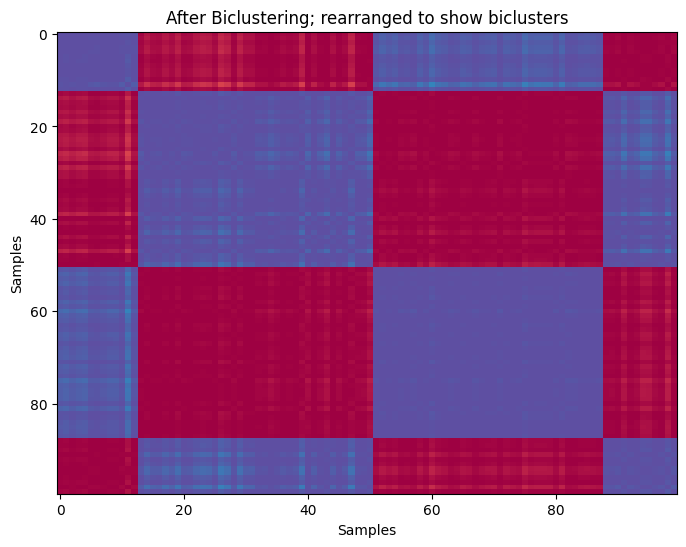

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import SpectralCoclustering

# 1. 가상 데이터 생성 (10차원, 100개의 샘플)
X, _ = make_blobs(n_samples=100, n_features=10, centers=2, random_state=42)

# 2. PCA를 사용한 차원 축소 (2차원으로)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. 코사인 유사성 행렬 계산
cosine_sim = cosine_similarity(X_pca)

# 4. Biclustering을 사용하여 코사인 유사성 행렬에 기반한 바이클러스터링 수행
biclustering = SpectralCoclustering(n_clusters=5, random_state=42)
biclustering.fit(cosine_sim)
row_labels = biclustering.row_labels_

# 5. 바이클러스터링 결과를 사용하여 행렬 재배열
fit_data = cosine_sim[np.argsort(row_labels), :]
fit_data = fit_data[:, np.argsort(row_labels)]

# 6. 시각화
plt.figure(figsize=(8, 6))
plt.imshow(fit_data, aspect='auto', cmap='Spectral')
plt.title('After Biclustering; rearranged to show biclusters')
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.show()

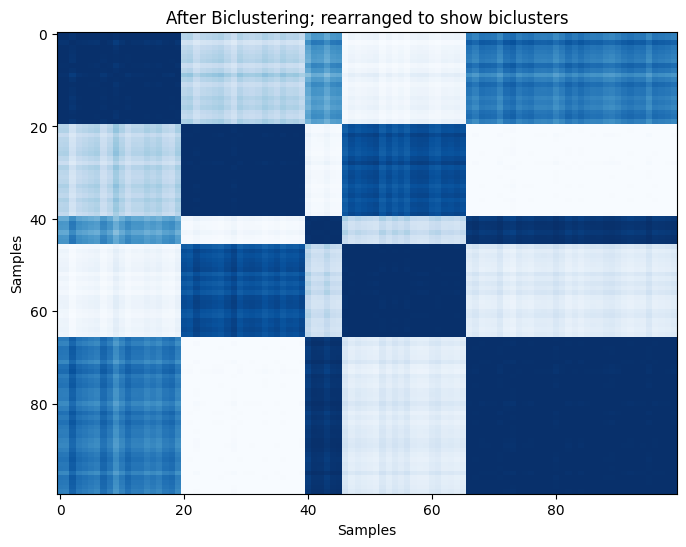

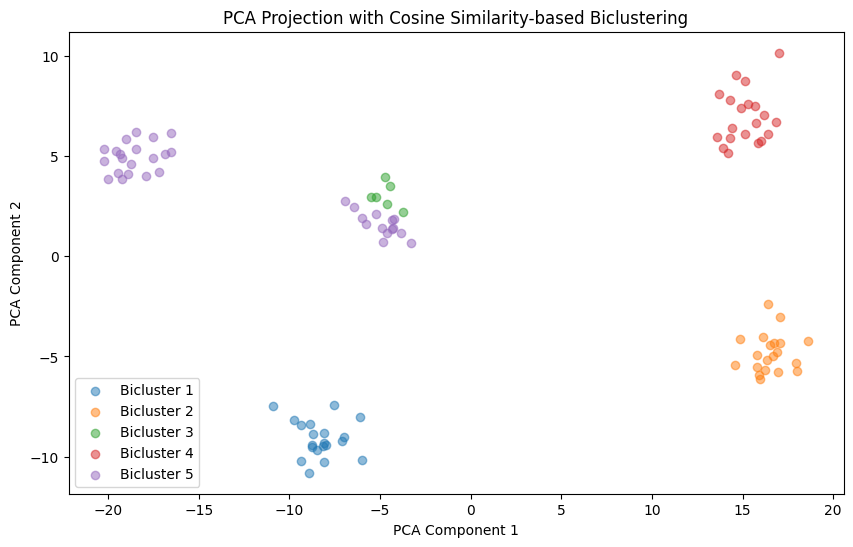

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import SpectralCoclustering, SpectralBiclustering

# 1. 가상 데이터 생성 (10차원, 100개의 샘플)
X, _ = make_blobs(n_samples=100, n_features=10, centers=5, random_state=42)

# 2. PCA를 사용한 차원 축소 (2차원으로)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. 코사인 유사성 행렬 계산
cosine_sim = cosine_similarity(X_pca)

# 4. Biclustering을 사용하여 코사인 유사성 행렬에 기반한 바이클러스터링 수행
biclustering = SpectralBiclustering(n_clusters=5, random_state=42)
biclustering.fit(cosine_sim)
row_labels = biclustering.row_labels_
column_labels = biclustering.column_labels_

# 5. 바이클러스터링 결과를 사용하여 행렬 재배열 (대각선 형태로 정렬)
fit_data = cosine_sim[np.argsort(row_labels), :]
fit_data = fit_data[:, np.argsort(row_labels)]

# 6. 시각화 (대각선 형태의 바이클러스터링 결과)
plt.figure(figsize=(8, 6))
plt.imshow(fit_data, aspect='auto', cmap='Blues')
plt.title('After Biclustering; rearranged to show biclusters')
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.show()

# 7. PCA 결과의 클러스터 시각화
plt.figure(figsize=(10, 6))

# 각 클러스터의 데이터 포인트를 시각화
for label in np.unique(row_labels):
    plt.scatter(X_pca[row_labels == label, 0], X_pca[row_labels == label, 1], label=f'Bicluster {label + 1}', alpha=0.5)

plt.title('PCA Projection with Cosine Similarity-based Biclustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


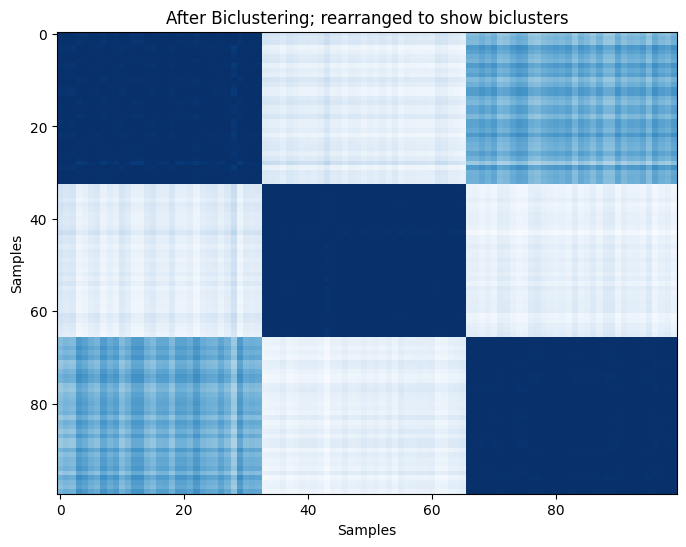

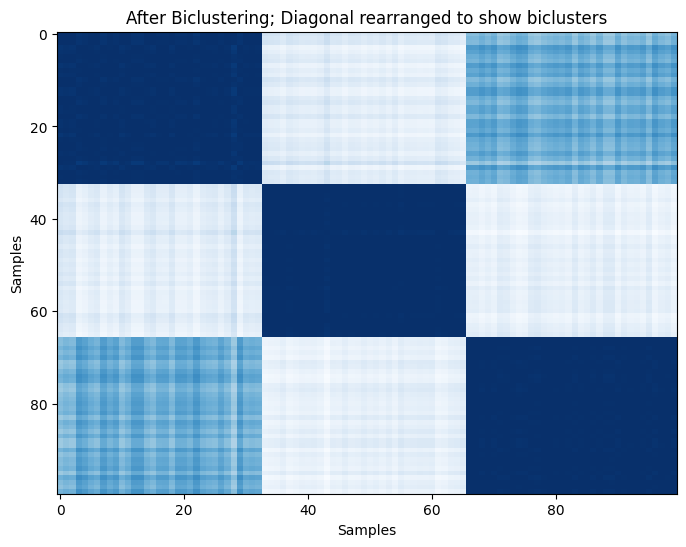

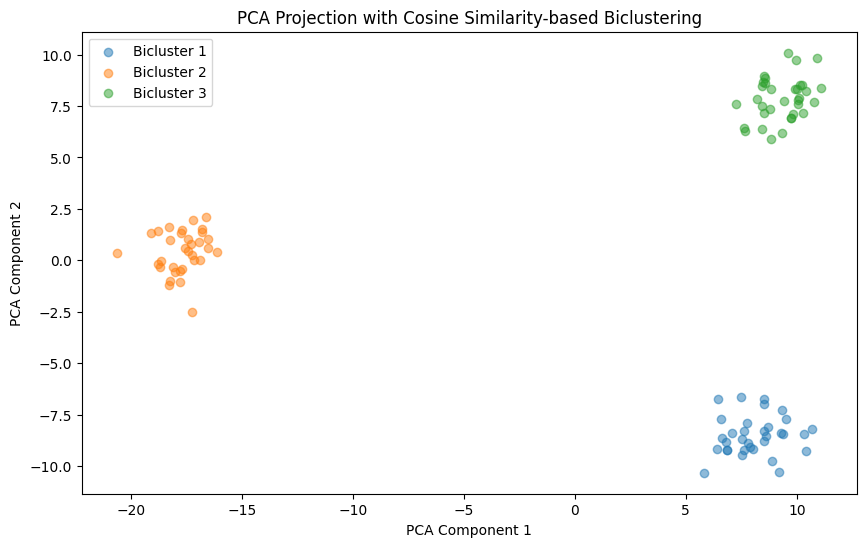

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import SpectralCoclustering, SpectralBiclustering

# 1. 가상 데이터 생성 (10차원, 100개의 샘플)
X, _ = make_blobs(n_samples=100, n_features=10, centers=3, random_state=42)

# 2. PCA를 사용한 차원 축소 (2차원으로)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. 코사인 유사성 행렬 계산
cosine_sim = cosine_similarity(X_pca)

# 4. Biclustering을 사용하여 코사인 유사성 행렬에 기반한 바이클러스터링 수행
biclustering = SpectralBiclustering(n_clusters=3, random_state=42)
biclustering.fit(cosine_sim)
row_labels = biclustering.row_labels_
column_labels = biclustering.column_labels_

# 5. 바이클러스터링 결과를 사용하여 행렬 재배열 (대각선 형태로 정렬)
fit_data = cosine_sim[np.argsort(row_labels), :]
fit_data = fit_data[:, np.argsort(column_labels)]

# 6. 시각화 (바이클러스터링 결과)
plt.figure(figsize=(8, 6))
plt.imshow(fit_data, aspect='auto', cmap='Blues')
plt.title('After Biclustering; rearranged to show biclusters')
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.show()

# 7. 대각선 방향으로 정렬된 바이클러스터링 결과 시각화
fit_data_diag = cosine_sim[np.argsort(row_labels), :]
fit_data_diag = fit_data_diag[:, np.argsort(row_labels)]

plt.figure(figsize=(8, 6))
plt.imshow(fit_data_diag, aspect='auto', cmap='Blues')
plt.title('After Biclustering; Diagonal rearranged to show biclusters')
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.show()

# 8. PCA 결과의 클러스터 시각화
plt.figure(figsize=(10, 6))

# 각 클러스터의 데이터 포인트를 시각화
for label in np.unique(row_labels):
    plt.scatter(X_pca[row_labels == label, 0], X_pca[row_labels == label, 1], label=f'Bicluster {label + 1}', alpha=0.5)

plt.title('PCA Projection with Cosine Similarity-based Biclustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

consensus score: 1.000


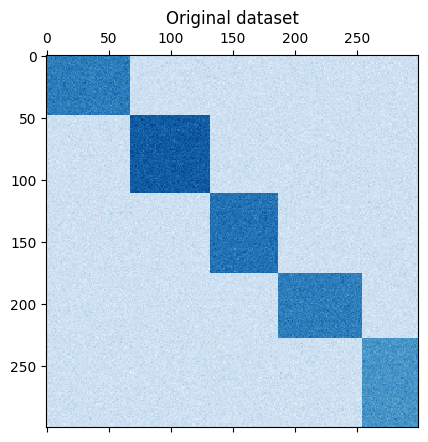

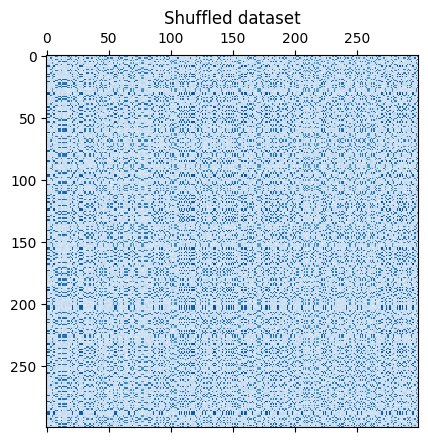

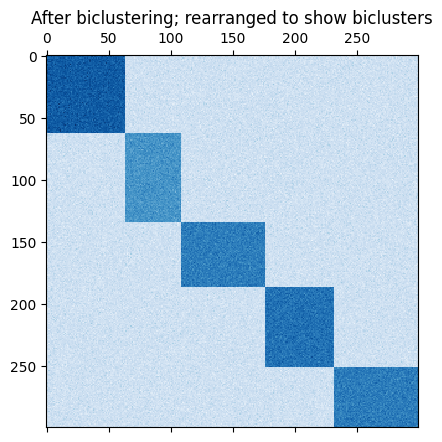

In [18]:
# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import SpectralCoclustering
from sklearn.datasets import make_biclusters
from sklearn.metrics import consensus_score

data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5, shuffle=False, random_state=0
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.3f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

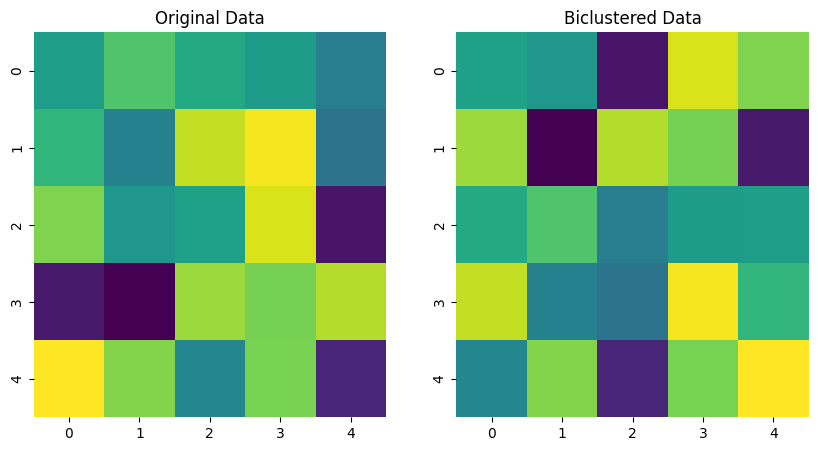

In [19]:
import numpy as np
from sklearn.cluster import SpectralBiclustering
import seaborn as sns
import matplotlib.pyplot as plt

# 5x5 행렬을 임의로 생성
np.random.seed(0)
data = np.random.rand(5, 5)

# biclustering 모델 생성 및 학습
model = SpectralBiclustering(n_clusters=5, random_state=0)
model.fit(data)

# bicluster된 행렬 재정렬
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

# 원본과 bicluster된 행렬 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(data, ax=ax1, cmap="viridis", cbar=False)
ax1.set_title("Original Data")
sns.heatmap(fit_data, ax=ax2, cmap="viridis", cbar=False)
ax2.set_title("Biclustered Data")
plt.show()

In [20]:
data

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
       [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215],
       [0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443]])

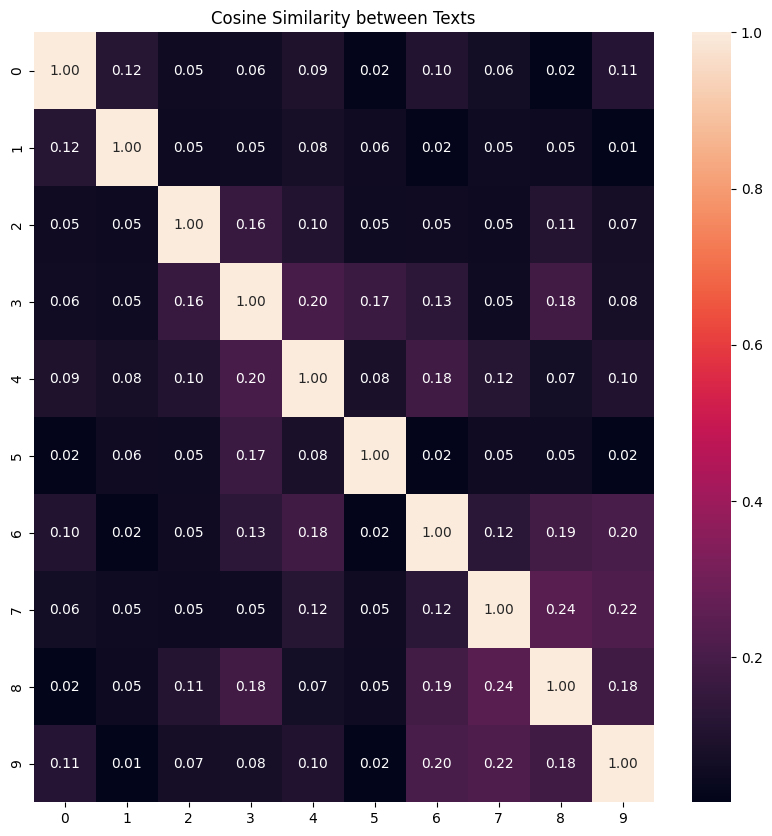

Text 0 (Genre: 과학) is in Cluster 1
Text 1 (Genre: 과학) is in Cluster 1
Text 2 (Genre: 과학) is in Cluster 0
Text 3 (Genre: 문학) is in Cluster 0
Text 4 (Genre: 문학) is in Cluster 0
Text 5 (Genre: 문학) is in Cluster 0
Text 6 (Genre: 음악) is in Cluster 2
Text 7 (Genre: 음악) is in Cluster 2
Text 8 (Genre: 음악) is in Cluster 2
Text 9 (Genre: 음악) is in Cluster 2


In [41]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# 3개 장르의 짧은 텍스트 생성
texts = [
    "Physics is a natural science that studies matter and its motion.",  # 과학
    "Chemistry deals with substances of which matter is composed.",  # 과학
    "Biology is the study of living organisms and their vital processes.",  # 과학
    "Literature is the art of written works, and it includes fiction.",  # 문학
    "Poetry is a form of literature that uses aesthetic and rhythmic qualities of language.",  # 문학
    "A novel is a relatively long work of narrative fiction.",  # 문학
    "Music is an art form, and cultural activity, that involves sound.",  # 음악
    "Jazz is a genre of music that originated in African-American communities.",  # 음악
    "Classical music is art music produced in the traditions of Western culture.",  # 음악
    "Rock music is a genre that evolved from rock and roll and pop music."  # 음악
]

# TF-IDF 행렬 생성
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# 코사인 유사성 계산
cosine_sim = cosine_similarity(tfidf_matrix)

# Agglomerative Clustering을 사용한 군집분석
clustering = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='average')
labels = clustering.fit_predict(1 - cosine_sim)


# 코사인 유사성 행렬 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(cosine_sim, annot=True, fmt='.2f', cbar=True)
plt.title("Cosine Similarity between Texts")
plt.show()

# 군집 결과 출력
for idx, label in enumerate(labels):
    genre = "과학" if idx < 3 else "문학" if idx < 6 else "음악"
    print(f"Text {idx} (Genre: {genre}) is in Cluster {label}")

In [52]:
# prompt: cosine_sim을 background style 데이터프레임으로 만들기, 각 행의 두번째로 큰 값은 강조표시

import pandas as pd

# cosine_sim을 데이터프레임으로 변환
df_cosine_sim = pd.DataFrame(cosine_sim)

# 각 행의 두 번째로 큰 값을 찾아 강조 표시하는 함수
def highlight_second_largest(row):
  """각 행의 두 번째로 큰 값을 강조 표시하는 함수"""
  values = row.values.astype(float)
  largest_value = np.nanmax(values)
  values[values == largest_value] = np.nan
  second_largest_value = np.nanmax(values)
  second_largest_index = row[row == second_largest_value].index[0]

  return ['background-color: yellow' if i == second_largest_index else '' for i in row.index]

# 스타일을 적용한 데이터프레임 생성
styled_df = df_cosine_sim.style.apply(highlight_second_largest, axis=1)

# 스타일이 적용된 데이터프레임 출력
styled_df

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.117787,0.054126,0.057761,0.093735,0.020214,0.103731,0.064771,0.016682,0.111804
1,0.117787,1.000000,0.049020,0.052312,0.075840,0.056903,0.018748,0.050935,0.046960,0.014743
2,0.054126,0.049020,1.000000,0.157903,0.103684,0.052888,0.054161,0.047341,0.108144,0.071478
3,0.057761,0.052312,0.157903,1.000000,0.199482,0.165404,0.133045,0.050520,0.184237,0.076278
4,0.093735,0.075840,0.103684,0.199482,1.000000,0.081824,0.180975,0.115448,0.067526,0.101095
5,0.020214,0.056903,0.052888,0.165404,0.081824,1.000000,0.020227,0.054954,0.050665,0.015906
6,0.103731,0.018748,0.054161,0.133045,0.180975,0.020227,1.000000,0.122724,0.191027,0.203676
7,0.064771,0.050935,0.047341,0.050520,0.115448,0.054954,0.122724,1.000000,0.238857,0.217314
8,0.016682,0.046960,0.108144,0.184237,0.067526,0.050665,0.191027,0.238857,1.000000,0.181070
9,0.111804,0.014743,0.071478,0.076278,0.101095,0.015906,0.203676,0.217314,0.181070,1.000000


In [22]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

# Sample text data
documents = [
    "AI is transforming industries with data-driven insights.",
    "Machine learning enables predictive analytics in various fields.",
    "Big data analytics helps in business decision making.",
    "The use of AI in healthcare is growing.",
    "AI is used to improve healthcare systems.",
    "Healthcare innovations through AI are the future.",
    "Deep learning models are advancing AI technologies.",
    "Predictive models help optimize business strategies."
]

# Step 1: Generate a TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Step 2: Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Step 3: Convert cosine similarity to cosine distance (1 - similarity)
cosine_dist = 1 - cosine_sim

# Step 4: Apply Agglomerative Clustering using the precomputed distance matrix
# Change 'affinity' to 'metric' and set it to 'precomputed'
cluster = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='complete')
cluster_labels = cluster.fit_predict(cosine_dist)

# Step 5: Group the documents into clusters
clustered_documents = {i: [] for i in range(3)}
for idx, label in enumerate(cluster_labels):
    clustered_documents[label].append(documents[idx])

# Output the clustered groups
for cluster, docs in clustered_documents.items():
    print(f"\nCluster {cluster}:")
    for doc in docs:
        print(f"- {doc}")


Cluster 0:
- Machine learning enables predictive analytics in various fields.
- Deep learning models are advancing AI technologies.
- Predictive models help optimize business strategies.

Cluster 1:
- AI is transforming industries with data-driven insights.
- Big data analytics helps in business decision making.

Cluster 2:
- The use of AI in healthcare is growing.
- AI is used to improve healthcare systems.
- Healthcare innovations through AI are the future.


In [23]:
cosine_sim

array([[1.        , 0.        , 0.12688527, 0.08348273, 0.07178786,
        0.08348273, 0.06473582, 0.        ],
       [0.        , 1.        , 0.11500909, 0.        , 0.        ,
        0.        , 0.13082475, 0.12576573],
       [0.12688527, 0.11500909, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.12576573],
       [0.08348273, 0.        , 0.        , 1.        , 0.2539205 ,
        0.29528637, 0.08607467, 0.        ],
       [0.07178786, 0.        , 0.        , 0.2539205 , 1.        ,
        0.2539205 , 0.0740167 , 0.        ],
       [0.08348273, 0.        , 0.        , 0.29528637, 0.2539205 ,
        1.        , 0.08607467, 0.        ],
       [0.06473582, 0.13082475, 0.        , 0.08607467, 0.0740167 ,
        0.08607467, 1.        , 0.14306062],
       [0.        , 0.12576573, 0.12576573, 0.        , 0.        ,
        0.        , 0.14306062, 1.        ]])

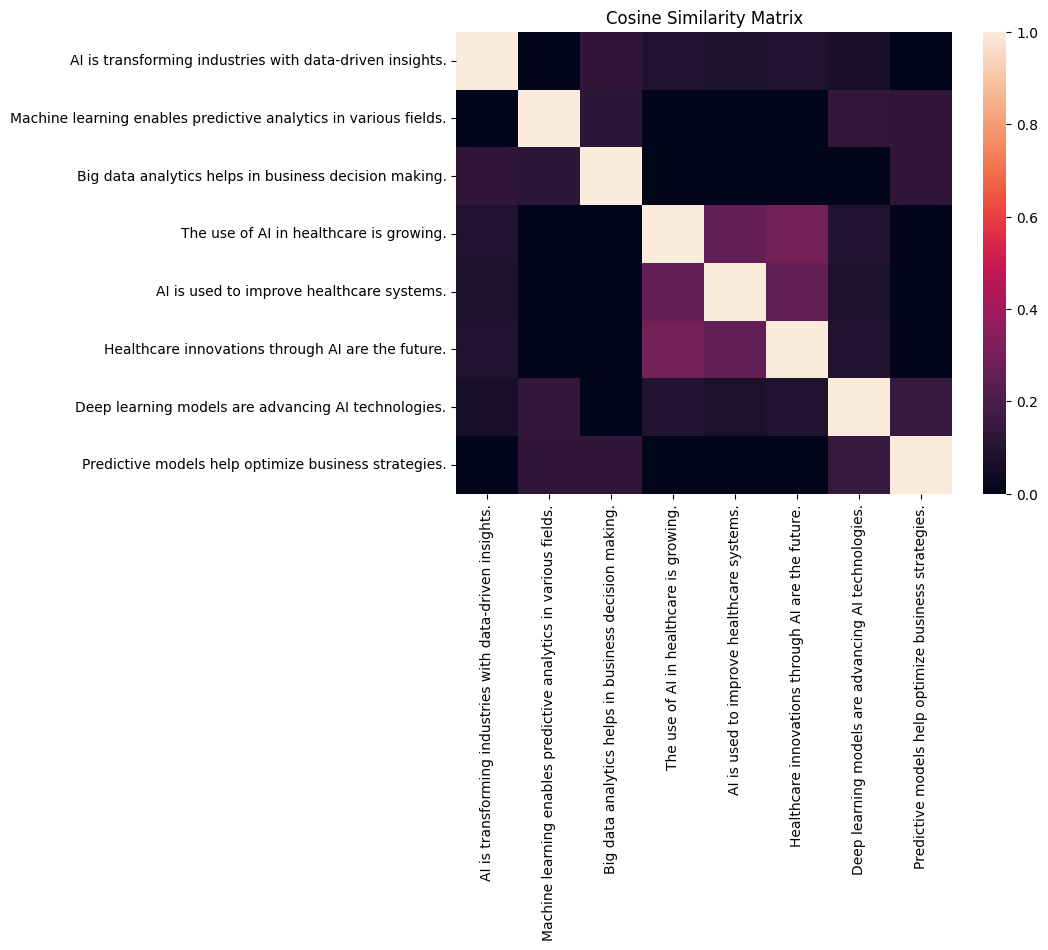

In [24]:
# prompt: cosine_sim를 시각화

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the cosine similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim, xticklabels=documents, yticklabels=documents)
plt.title('Cosine Similarity Matrix')
plt.show()